# Overview

Provide an overview of the WSRA datasets.

In [1]:
import os
from datetime import datetime, timezone

import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywsra
import xarray as xr
from matplotlib.animation import FuncAnimation, ArtistAnimation
from IPython.display import HTML
from scipy import stats

import plotting
from configure import read_stored_variable

## Setup

In [2]:
%run 'nb1-transform.ipynb'
%run -i configure.py

earl_masked_ds = read_stored_variable('earl_masked_ds')
fiona_masked_ds = read_stored_variable('fiona_masked_ds')
ian_masked_ds = read_stored_variable('ian_masked_ds')
# julia_masked_ds = read_stored_variable('julia_masked_ds')
idalia_masked_ds = read_stored_variable('idalia_masked_ds')
lee_masked_ds = read_stored_variable('lee_masked_ds')

earl_best_track = read_stored_variable('earl_best_track')
fiona_best_track = read_stored_variable('fiona_best_track')
ian_best_track = read_stored_variable('ian_best_track')
# julia_best_track = read_stored_variable('julia_best_track')
idalia_best_track = read_stored_variable('idalia_best_track')
lee_best_track = read_stored_variable('lee_best_track')

plotting.configure_figures()

/Users/jacob/Programs/pywsra/src/pywsra/met.py:166: RuntimeWarning: All-NaN slice encountered
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:166: RuntimeWarning: All-NaN slice encountered
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:166: RuntimeWarning: All-NaN slice encountered
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:166: RuntimeWarning: All-NaN slice encountered
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:166: RuntimeWarning: All-NaN slice encountered
  values.append(resample_method(met_in_window[var].values))
/opt/homebrew/Caskroom/miniconda/base/envs/wsra-mss/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/Caskroom/m

AL062022: 1858 masked values (65.7%).
AL072022: 397 masked values (27.4%).
AL092022: 508 masked values (35.3%).
AL102023: 137 masked values (17.5%).
AL132023: 978 masked values (41.9%).


## Global Map

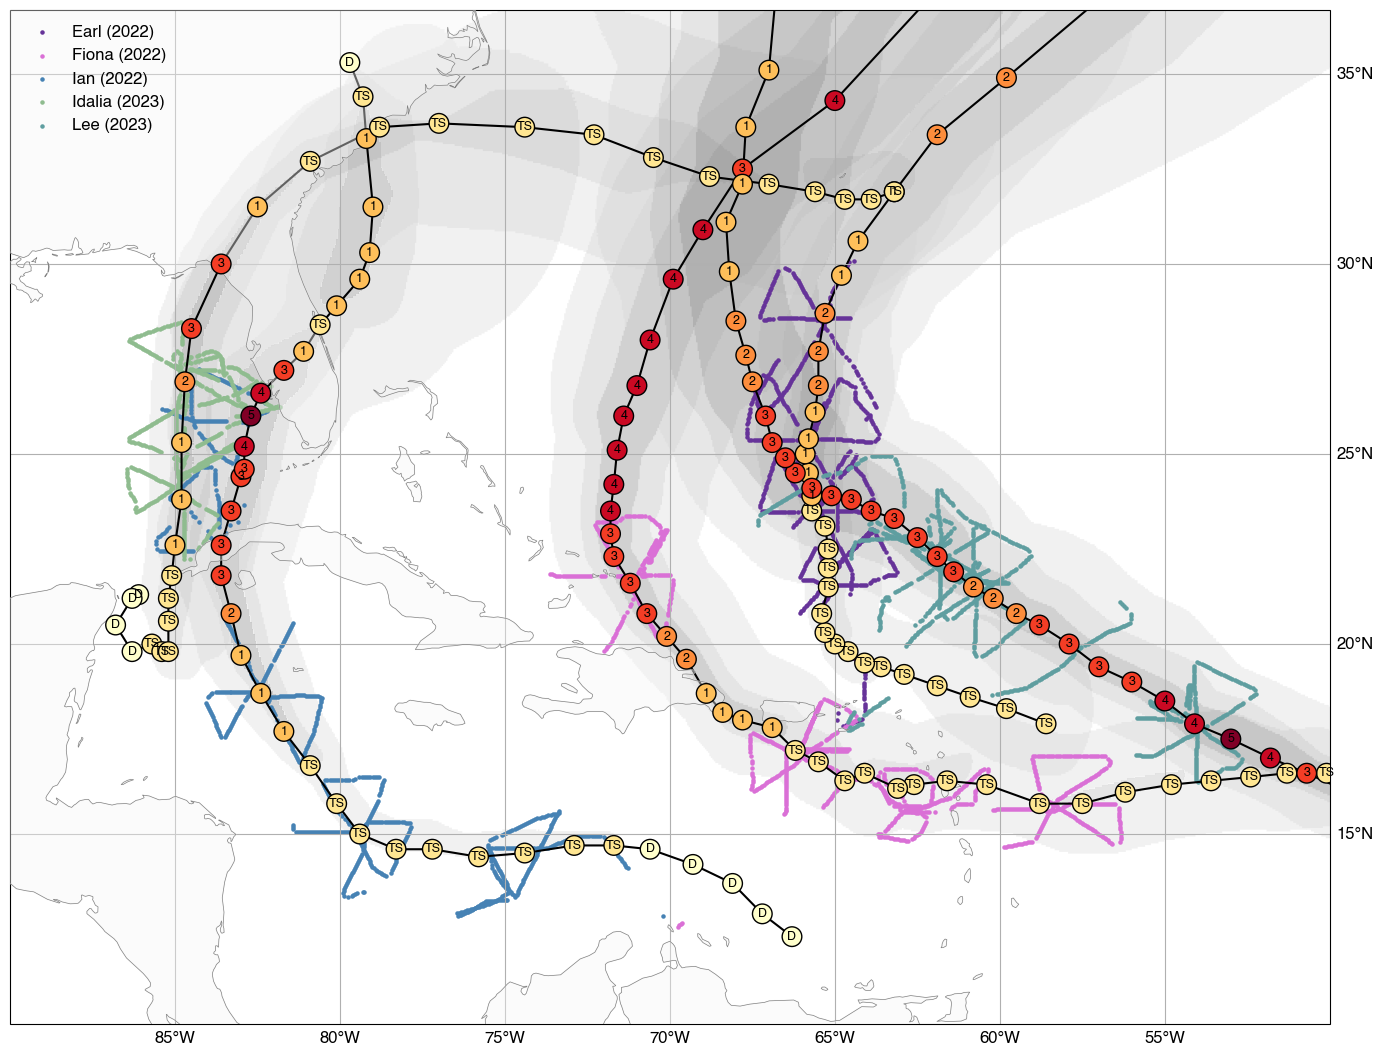

In [3]:
FIG_TITLE = f"wsra_track_summary_2022-2023"
FIG_SIZE = (14, 14)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-90, -50, 10, 35])
CRS = cartopy.crs.PlateCarree()

# Initialize the figure
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)

# Add the ocean and land features
plotting.plot_base_chart(ax, extent=EXTENT)

# Plot best tracks
plotting.plot_best_track(*earl_best_track, ax=ax)
plotting.plot_best_track(*fiona_best_track, ax=ax)
plotting.plot_best_track(*ian_best_track, ax=ax)
# plotting.plot_best_track(*julia_best_track, ax=ax)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_best_track(*lee_best_track, ax=ax)

# Plot WSRA tracks
plotting.plot_wsra_track(earl_masked_ds, ax=ax)
plotting.plot_wsra_track(fiona_masked_ds, ax=ax)
plotting.plot_wsra_track(ian_masked_ds, ax=ax)
# plotting.plot_wsra_track(julia_masked_ds, ax=ax)
plotting.plot_wsra_track(idalia_masked_ds, ax=ax)
plotting.plot_wsra_track(lee_masked_ds, ax=ax)

ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Earl

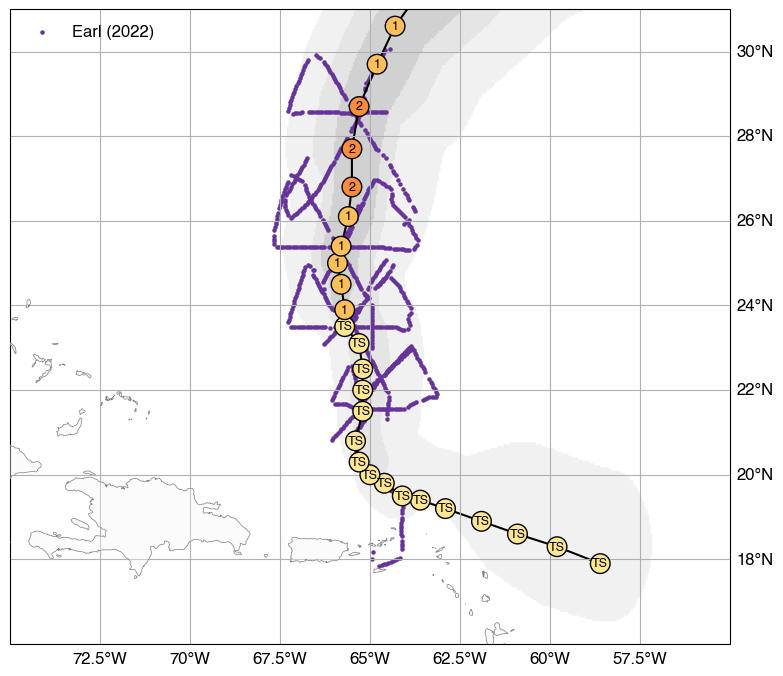

In [4]:
FIG_TITLE = f"wsra_track_earl_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-75, -55, 16, 31])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*earl_best_track, ax=ax)
plotting.plot_wsra_track(earl_masked_ds, ax=ax)

ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Fiona

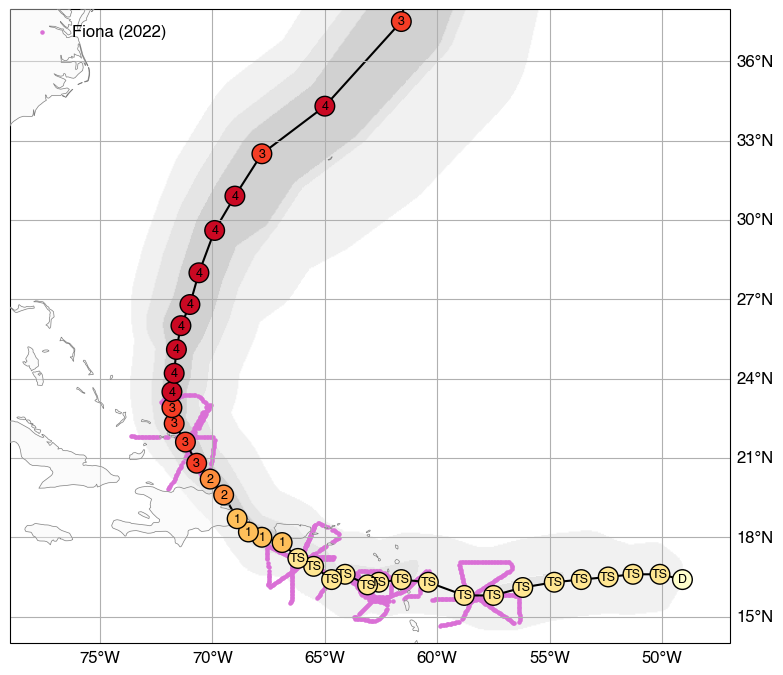

In [5]:
FIG_TITLE = f"wsra_track_fiona_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-79, -47, 14, 37])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*fiona_best_track, ax=ax)
plotting.plot_wsra_track(fiona_masked_ds, ax=ax)

ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Ian

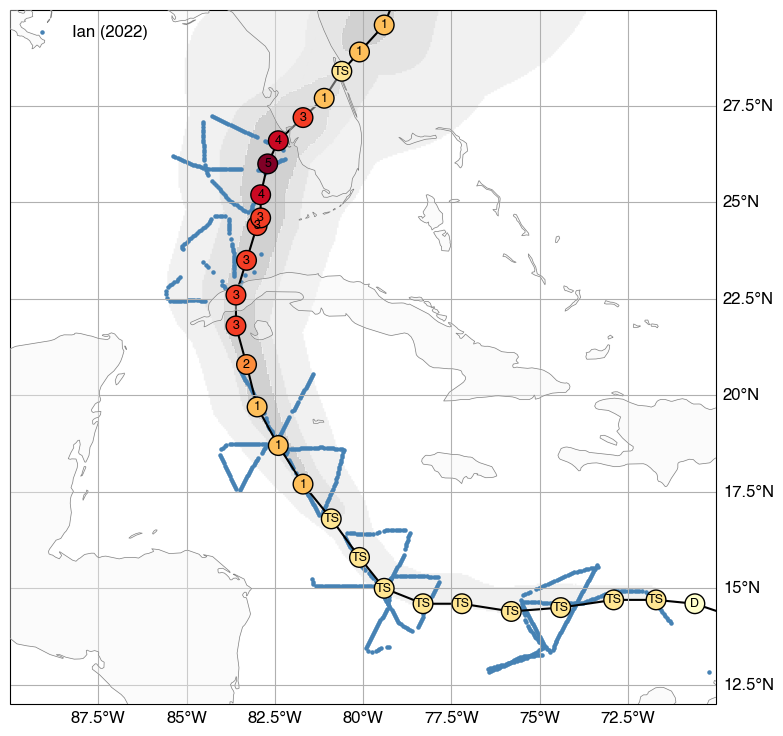

In [12]:
FIG_TITLE = f"wsra_track_ian_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-90, -70, 12, 30])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*ian_best_track, ax=ax)
plotting.plot_wsra_track(ian_masked_ds, ax=ax)

ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Idalia

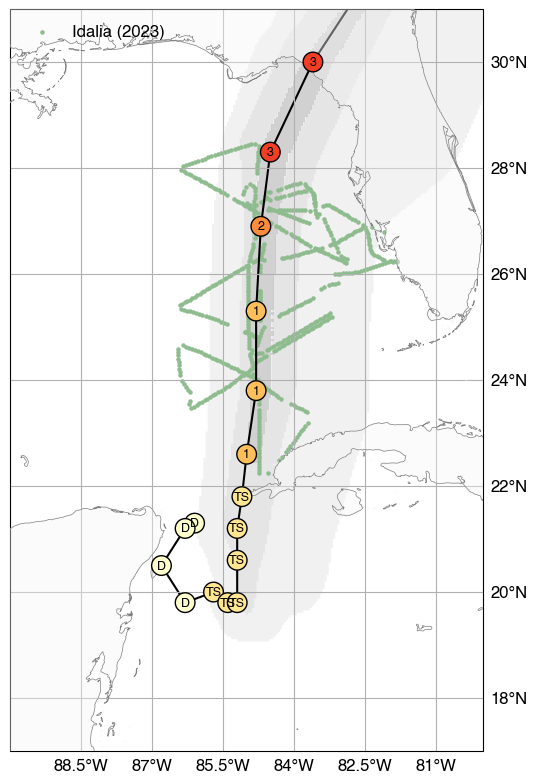

In [16]:
FIG_TITLE = f"wsra_track_idalia_2023"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-90, -80, 17, 31])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_wsra_track(idalia_masked_ds, ax=ax)

ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Lee

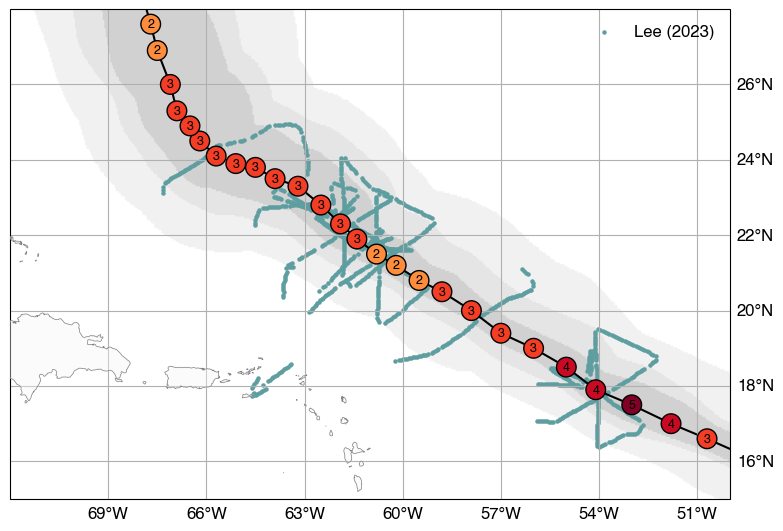

In [32]:
FIG_TITLE = f"wsra_track_lee_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-72, -50, 15, 28])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*lee_best_track, ax=ax)
plotting.plot_wsra_track(lee_masked_ds, ax=ax)

ax.legend(frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()